In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

def subplots(rf_random):
    rf_df = pd.DataFrame(rf_random.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
    rf_df = rf_df.drop([
                'mean_fit_time', 
                'std_fit_time', 
                'mean_score_time',
                'std_score_time', 
                'params', 
                'split0_test_score', 
                'split1_test_score', 
                'split2_test_score',
                'split3_test_score',
                'split4_test_score',
                'std_test_score'],
                axis=1)
    rf_df.fillna("NA",inplace=True)

    fig, axs = plt.subplots(ncols=3, nrows=3)
    sns.set(style="whitegrid", color_codes=True, font_scale = 2)
    fig.set_size_inches(40,40)

    sns.barplot(x='param_n_estimators', y='mean_test_score', data=rf_df, ax=axs[0,0], color='lightgrey')
    axs[0,0].set_ylim([.5,.63])
    axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
    axs[0,0].set_xticklabels(sorted(rf_df["param_n_estimators"].unique()),rotation=90)

    sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rf_df, ax=axs[0,1], color='coral')
    axs[0,1].set_ylim([.5,.63])
    axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')

    sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rf_df, ax=axs[0,2], color='lightgreen')
    axs[0,2].set_ylim([.5,.63])
    axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')

    sns.barplot(x='param_max_features', y='mean_test_score', data=rf_df, ax=axs[1,0], color='wheat')
    axs[1,0].set_ylim([.5,.63])
    axs[1,0].set_title(label = 'max_features', size=30, weight='bold')

    sns.barplot(x='param_max_depth', y='mean_test_score', data=rf_df, ax=axs[1,1], color='lightpink')
    axs[1,1].set_ylim([.5,.63])
    axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
    #axs[1,1].set_xticklabels(sorted(list(rs_df["param_max_depth"].unique())),rotation=45)

    sns.barplot(x='param_bootstrap',y='mean_test_score', data=rf_df, ax=axs[1,2], color='skyblue')
    axs[1,2].set_ylim([.5,.63])
    axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')

    sns.barplot(x='param_criterion',y='mean_test_score', data=rf_df, ax=axs[2,0], color='red')
    axs[1,2].set_ylim([.5,.63])
    axs[2,0].set_title(label = 'param_criterion', size=30, weight='bold')

    plt.show()

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


In [2]:
np.random.seed(0)

train_data = pd.read_csv("/kaggle/input/marketing-strategy-personalised-offer/train_data.csv")
test_data = pd.read_csv("/kaggle/input/marketing-strategy-personalised-offer/test_data.csv")

train_label = train_data[list(train_data.columns)[-1]]
train_data = train_data[list(train_data.columns)[:-1]]

train_data.drop("car",axis = 1, inplace = True) #drop 'car' column beacuse there are too many NaN values
test_data.drop("car",axis = 1, inplace = True)

values = {"no_visited_Cold drinks": "never", "Restaur_spend_less_than20": "never", "no_visited_bars": "never", "no_Take-aways": "never", "Restaur_spend_greater_than20": "never"}
train_data.fillna(value = values, inplace = True) #fill in the NaN values for the above columns
test_data.fillna(value = values, inplace = True)

#train_data.fillna(value = "na", inplace = True) #fill in the NaN values for the above columns
#test_data.fillna(value = "na", inplace = True)

train_data.replace("less1", "never", inplace = True) #replace 'less1' values with 'never' beacuse they mean the same
test_data.replace("less1", "never", inplace = True)

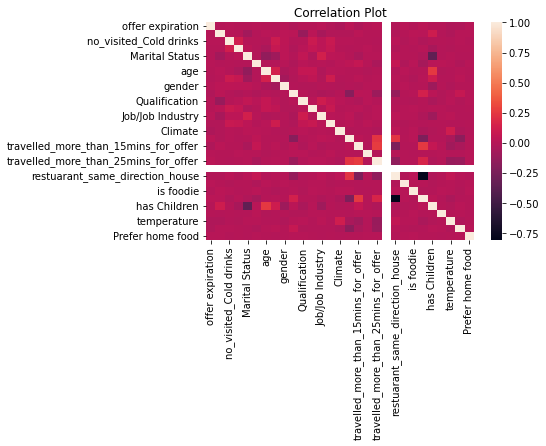

In [3]:
features_to_encode = train_data.columns[train_data.dtypes==object].tolist() #features that have dtype = object
features_to_not_encode = train_data.columns[train_data.dtypes==int].tolist() #features that have dtype = int64

from sklearn.preprocessing import OrdinalEncoder
ordinal_enc = OrdinalEncoder()
transformed_train_data = pd.DataFrame(ordinal_enc.fit_transform(train_data[features_to_encode]),columns = ordinal_enc.feature_names_in_)
transformed_test_data = pd.DataFrame(ordinal_enc.fit_transform(test_data[features_to_encode]),columns = ordinal_enc.feature_names_in_)

transformed_train_data = transformed_train_data.join(train_data[features_to_not_encode])
transformed_test_data = transformed_test_data.join(test_data[features_to_not_encode])

corr_df=transformed_train_data[features_to_not_encode]
cor= transformed_train_data.corr(method='pearson')

fig, ax =plt.subplots(figsize=(6, 4))
plt.title("Correlation Plot")
sns.heatmap(cor)
plt.show()

In [4]:
from sklearn.feature_selection import VarianceThreshold
variance_selector = VarianceThreshold()
transformed_train_data = pd.DataFrame(variance_selector.fit_transform(transformed_train_data),columns = variance_selector.get_feature_names_out(input_features=variance_selector.feature_names_in_))
transformed_test_data = pd.DataFrame(variance_selector.fit_transform(transformed_test_data),columns = variance_selector.get_feature_names_out(input_features=variance_selector.feature_names_in_))

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_train_data,train_label,test_size=0.2, random_state = 0)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
print("The accuracy of the model is:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, pos_label = "Yes"))
rf_classifier.get_params()

The accuracy of the model is: 0.6482229402261712
Confusion Matrix:
 [[ 471  586]
 [ 285 1134]]
F1 Score:  0.7225230965275566


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [7]:
n_estimators = [int(x) for x in range(100,2200,100)]
criterion = ["gini", "entropy"]
max_depth = [int(x) for x in range(20,220,20)]   # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2,5,10]  # Minimum number of samples required to split a node
min_samples_leaf = [1, 4, 10]    # Minimum number of samples required at each leaf node
max_features = ['sqrt', 'log2', None]  # Number of features to consider at every split
max_leaf_nodes = [int(x) for x in range(10,50)]
max_leaf_nodes.append(None)
bootstrap = [True]



from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes,
               'bootstrap': bootstrap,
               'criterion':criterion}

rf = RandomForestClassifier(oob_score = True,n_jobs=-1)
rf_randomCV = RandomizedSearchCV(
                        estimator = rf,
                        param_distributions = random_grid,
                        n_iter = 100, 
                        cv = None,
                        verbose=1, 
                        random_state=0, 
                        scoring=None,
                        n_jobs=-1)
rf_randomCV.fit(X_train, y_train)
rf_randomCV.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'n_estimators': 2100,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': True}

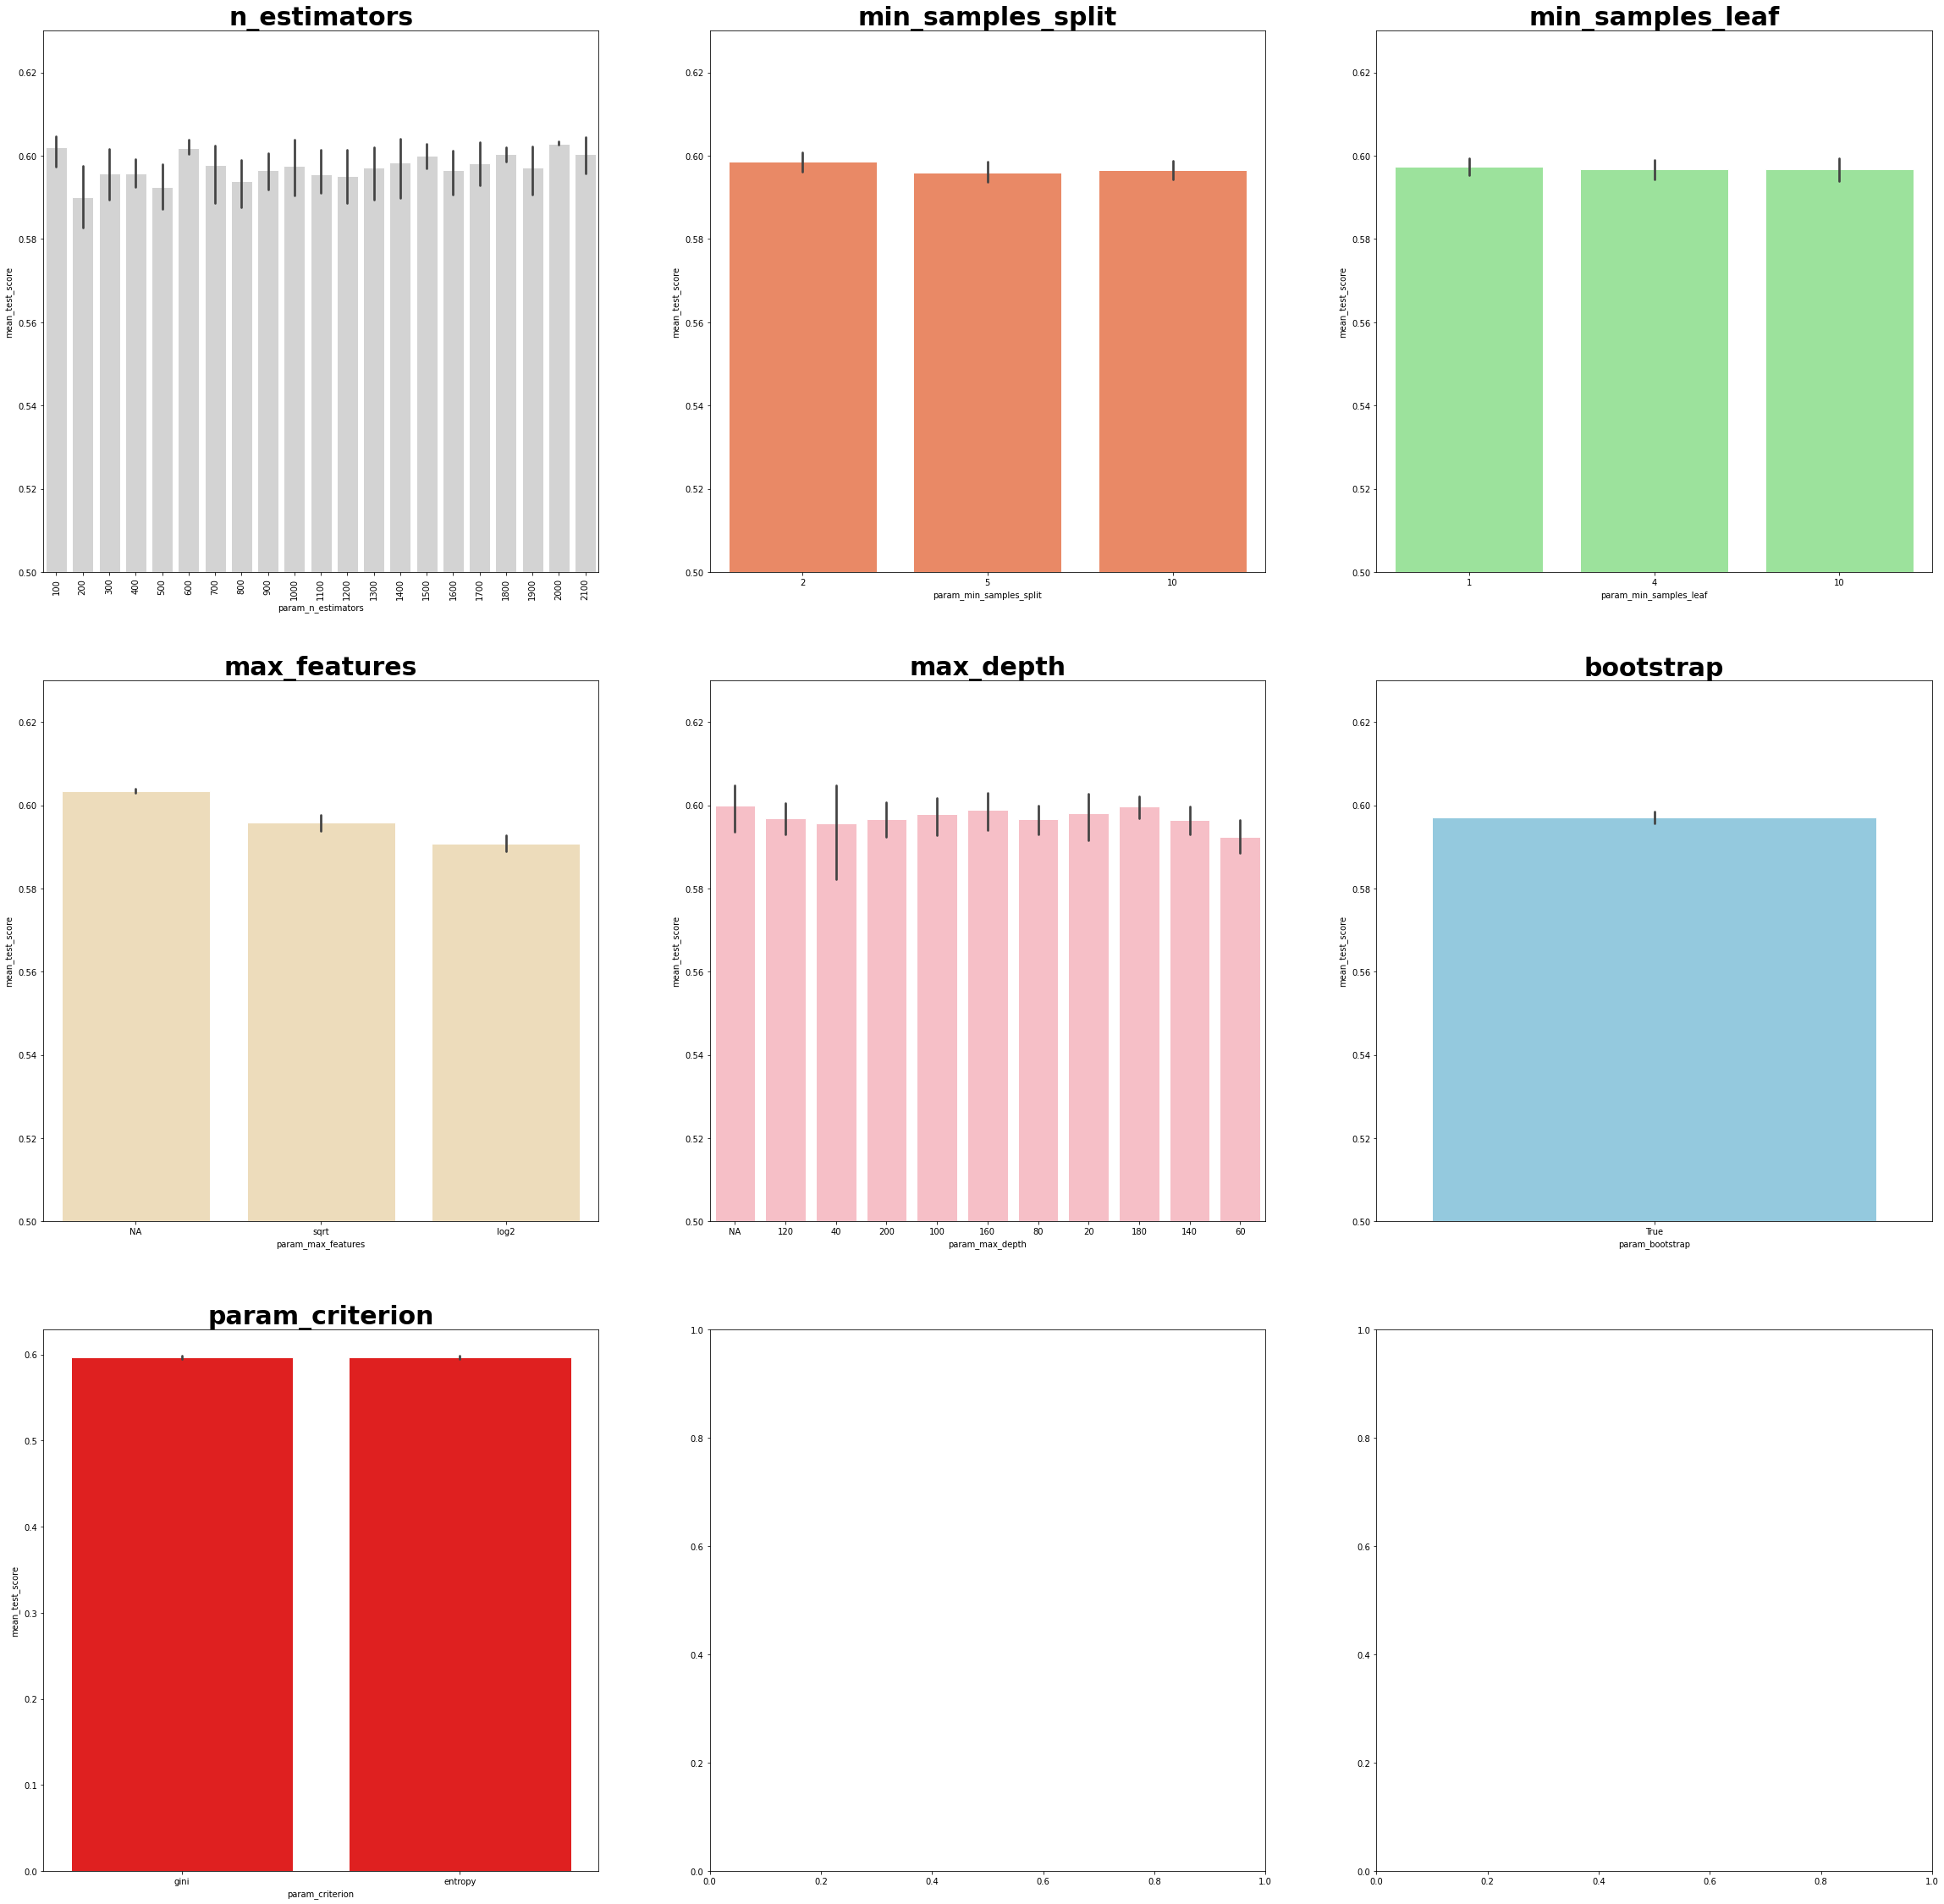

In [8]:
subplots(rf_randomCV)

In [9]:
from sklearn.model_selection import GridSearchCV
grid = {'n_estimators': [2000,500,100],
                       'max_features': [None],
                       'max_depth': [40,80,120],
                       'min_samples_split': [10],
                       'min_samples_leaf': [10],
                       'max_leaf_nodes': [None],
                       'bootstrap': [True],
                       'criterion':["entropy","gini"]}

rf_gridCV = GridSearchCV(
                        estimator = rf,
                        param_grid = grid,
                        cv = None,
                        verbose=1,
                        scoring=None,
                        n_jobs=-1)
rf_gridCV.fit(X_train, y_train)
rf_gridCV.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 120,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 100}

In [10]:
random_grid2 = random_grid
random_grid2["bootstrap"] = [True, False]
rf2 = RandomForestClassifier(oob_score = False,n_jobs=-1)
rf2_randomCV = RandomizedSearchCV(
                        estimator = rf2,
                        param_distributions = random_grid2,
                        n_iter = 100, 
                        cv = None,
                        verbose=1, 
                        random_state=0, 
                        scoring=None,
                        n_jobs=-1)
rf2_randomCV.fit(X_train, y_train)
rf2_randomCV.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'n_estimators': 2100,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_leaf_nodes': None,
 'max_features': 'log2',
 'max_depth': 100,
 'criterion': 'entropy',
 'bootstrap': False}

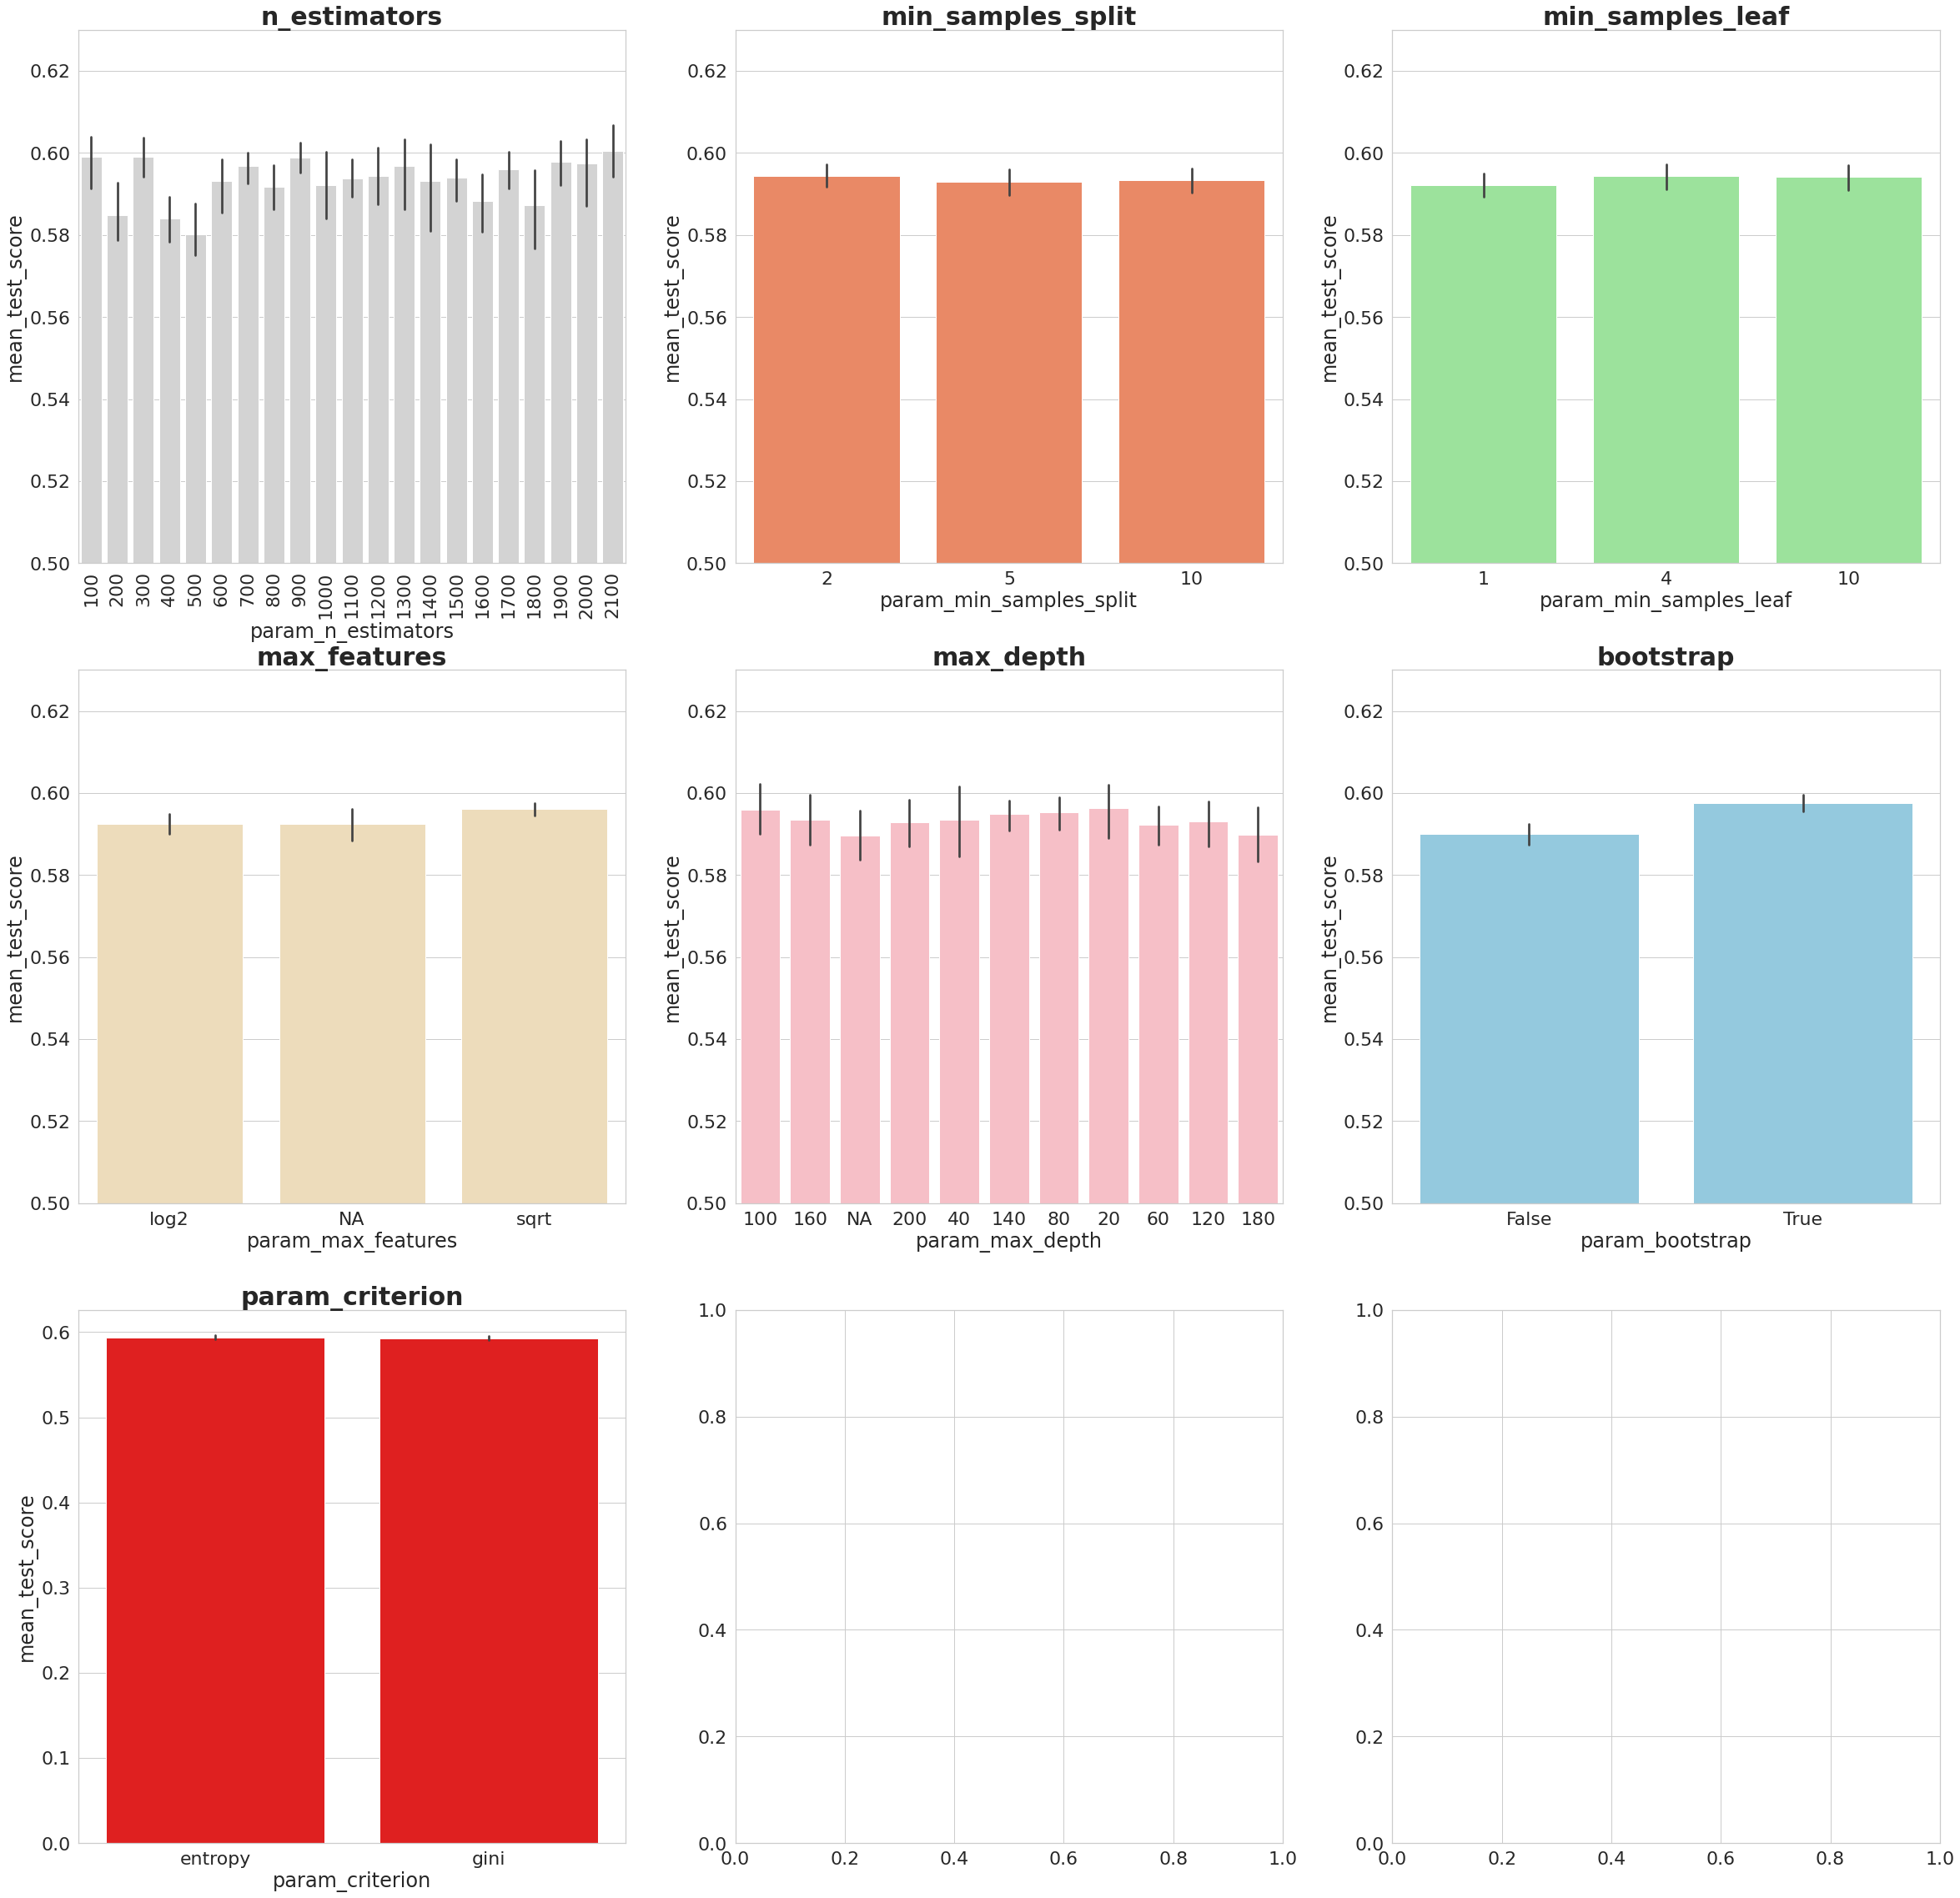

In [11]:
subplots(rf2_randomCV)

In [12]:
grid2 = {'n_estimators': [300,700,],
                       'max_features': ['sqrt'],
                       'max_depth': [80,180],
                       'min_samples_split': [10],
                       'min_samples_leaf': [10],
                       'max_leaf_nodes': [None],
                       'bootstrap': [True],
                       'criterion':["entropy","gini"]}

rf2_gridCV = GridSearchCV(
                        estimator = rf2,
                        param_grid = grid2,
                        cv = None,
                        verbose=1,
                        scoring=None,
                        n_jobs=-1)
rf2_gridCV.fit(X_train, y_train)
rf2_gridCV.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 700}

In [13]:
best_model1 = rf_gridCV.best_estimator_
best_model2 = rf2_gridCV.best_estimator_
best_model1.fit(X_train, y_train)
best_model2.fit(X_train, y_train)
y_pred_best_model1 = best_model1.predict(X_test)
y_pred_best_model2 = best_model2.predict(X_test)

In [14]:
print("Model A:")
print("Accuracy:",accuracy_score(y_test,y_pred_best_model1))
print("F1 Score:",f1_score(y_test,y_pred_best_model1,pos_label="Yes"))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_best_model1))

print("\nModel B:")
print("Accuracy:", accuracy_score(y_test,y_pred_best_model2))
print("F1 Score:",f1_score(y_test,y_pred_best_model2,pos_label="Yes"))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_best_model2))

Model A:
Accuracy: 0.6433764135702746
F1 Score: 0.7176207227374479
Confusion Matrix:
 [[ 471  586]
 [ 297 1122]]

Model B:
Accuracy: 0.6429725363489499
F1 Score: 0.7326073805202663
Confusion Matrix:
 [[ 381  676]
 [ 208 1211]]


In [15]:
train_predict1 = rf_classifier.predict(transformed_train_data)
print("Model 1:")
print("Confusion Matrix:\n",confusion_matrix(train_predict1, train_label))
print("F1 Score:",f1_score(train_predict1, train_label,pos_label="Yes"))

Model 1:
Confusion Matrix:
 [[4799  285]
 [ 586 6709]]
F1 Score: 0.9390440198754286


In [16]:
train_predict2 = rf_randomCV.best_estimator_.predict(transformed_train_data)
print("Model 2:")
print("Confusion Matrix:\n",confusion_matrix(train_predict2, train_label))
print("F1 Score:",f1_score(train_predict2, train_label,pos_label="Yes"))

Model 2:
Confusion Matrix:
 [[4622  342]
 [ 763 6652]]
F1 Score: 0.9233118190020125


In [17]:
train_predict3 = rf2_randomCV.best_estimator_.predict(transformed_train_data)
print("Model 3:")
print("Confusion Matrix:\n",confusion_matrix(train_predict3, train_label))
print("F1 Score:",f1_score(train_predict3, train_label,pos_label="Yes"))

Model 3:
Confusion Matrix:
 [[4703  230]
 [ 682 6764]]
F1 Score: 0.936842105263158


In [18]:
train_predict4 = rf_gridCV.best_estimator_.predict(transformed_train_data)
print("Model 4:")
print("Confusion Matrix:\n",confusion_matrix(train_predict4, train_label))
print("F1 Score:",f1_score(train_predict4, train_label,pos_label="Yes"))

Model 4:
Confusion Matrix:
 [[3616  641]
 [1769 6353]]
F1 Score: 0.8405662873776132


In [19]:
train_predict5 = rf2_gridCV.best_estimator_.predict(transformed_train_data)
print("Model 5:")
print("Confusion Matrix:\n",confusion_matrix(train_predict5, train_label))
print("F1 Score:",f1_score(train_predict5, train_label,pos_label="Yes"))

Model 5:
Confusion Matrix:
 [[2961  494]
 [2424 6500]]
F1 Score: 0.8166855132554343


In [20]:
test_predict1 = pd.DataFrame(rf_classifier.predict(transformed_test_data),columns = ["Offer Accepted",])
test_predict1.index.name = 'id'
test_predict1.to_csv('out1.csv')
test_predict1.value_counts()

Offer Accepted
Yes               3577
No                1728
dtype: int64

In [21]:
test_predict2 = pd.DataFrame(rf_randomCV.predict(transformed_test_data),columns = ["Offer Accepted",])
test_predict2.index.name = 'id'
test_predict2.to_csv('out2.csv')
test_predict2.value_counts()

Offer Accepted
Yes               3585
No                1720
dtype: int64

In [22]:
test_predict3 = pd.DataFrame(rf2_randomCV.predict(transformed_test_data),columns = ["Offer Accepted",])
test_predict3.index.name = 'id'
test_predict3.to_csv('out3.csv')
test_predict3.value_counts()

Offer Accepted
Yes               3848
No                1457
dtype: int64

In [23]:
test_predict4 = pd.DataFrame(rf_gridCV.predict(transformed_test_data),columns = ["Offer Accepted",])
test_predict4.index.name = 'id'
test_predict4.to_csv('out4.csv')
test_predict4.value_counts()

Offer Accepted
Yes               3620
No                1685
dtype: int64

In [24]:
test_predict5 = pd.DataFrame(rf2_gridCV.predict(transformed_test_data),columns = ["Offer Accepted",])
test_predict5.index.name = 'id'
test_predict5.to_csv('out5.csv')
test_predict5.value_counts()

Offer Accepted
Yes               3966
No                1339
dtype: int64

In [25]:
#Websites I referred to while doing this project:

#https://scikit-learn.org/stable/user_guide.html
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#https://stackoverflow.com/questions/74164123/decision-tree-classifier-throws-keyerror-log-loss
#https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do
#https://towardsdatascience.com/machine-learning-step-by-step-6fbde95c455a
#https://seaborn.pydata.org/generated/seaborn.barplot.html
#https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10
#https://towardsdatascience.com/pca-is-not-feature-selection-3344fb764ae6
#https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f
#https://gijopeter.medium.com/cross-validation-for-ml-feature-selection-ffdb71e5a68f
#https://towardsdatascience.com/using-the-chi-squared-test-for-feature-selection-with-implementation-b15a4dad93f1
#https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
#https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
#https://medium.com/@snk.nitin/decision-trees-random-forests-and-pca-e676e4c142c6
